In [1]:
import random

In [191]:
import numpy as np
import pandas as pd

In [192]:
from scipy. stats import norm

In [193]:
import matplotlib.pyplot as plt

In [194]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score

In [195]:
from sklearn.linear_model import LogisticRegression as LR

In [196]:
# создание случайной выборки по нормальному распределению
def random_diff(state, N=500000, Mu=0, Sigma=1):
    np.random.seed(state)
    return np.random.normal(Mu, Sigma, int(N))

# функция сигмоиды
def sigmoid(x):
    return 1/(1+np.exp(-x))

# расчет Gini 
def gini(df, target='BAD_FLAG', score='SCORE', plot=False):
    fpr, tpr, _ = metrics.roc_curve(df[target], df[score])
    gini = 2 * metrics.auc(fpr, tpr) - 1
    if plot:
        plt.figure(figsize = (5, 5))
        plt.title('ROC')
        plt.plot(fpr, tpr, label = 'GINI = %0.4f'%gini, color = 'green')
        plt.legend(loc = 'lower right') #, fontsize=10)
        plt.plot([0, 1], [0, 1], 'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.ylabel('Ture Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()
    return gini

# применение калибровки 
def calibration(Score, B0, B1):
    return 1/(1+np.exp(-B0-B1*Score))

In [11]:
# шкала на N_grade рейтингов 
N_grade = 16
[(1+2**0.5)*2**((-N_grade-3+i)/2) for i in range(1,17)]

[0.004715260864009951,
 0.006668385864009951,
 0.009430521728019902,
 0.013336771728019902,
 0.018861043456039804,
 0.026673543456039804,
 0.03772208691207961,
 0.05334708691207961,
 0.07544417382415922,
 0.10669417382415922,
 0.15088834764831843,
 0.21338834764831843,
 0.30177669529663687,
 0.42677669529663687,
 0.6035533905932737,
 0.8535533905932737]

In [12]:
[2**((-N_grade+i)/2) for i in range(1,17)]

[0.005524271728019903,
 0.0078125,
 0.011048543456039806,
 0.015625,
 0.02209708691207961,
 0.03125,
 0.04419417382415922,
 0.0625,
 0.08838834764831845,
 0.125,
 0.1767766952966369,
 0.25,
 0.3535533905932738,
 0.5,
 0.7071067811865476,
 1.0]

In [13]:
# Расчет рейтинга
def grade(pd):
    for i in range(1,17):
        R_pd = 2**((-N_grade+i)/2)
        if pd < R_pd:
            return i

In [16]:
grade(0.04999)

8

In [197]:
# Расчет рейтинга
def grade(pd):
    if pd < 0.05:
        return 1
    elif pd < 0.1:
        return 2
    elif pd < 0.15:
        return 3
    elif pd < 0.2:
        return 4
    elif pd < 0.25:
        return 5
    elif pd < 0.3:
        return 6
    elif pd < 0.35:
        return 7
    elif pd < 0.4:
        return 8
    elif pd < 0.45:
        return 9
    elif pd < 0.5:
        return 10
    elif pd < 0.55:
        return 11
    elif pd < 0.6:
        return 12
    elif pd < 0.65:
        return 13
    elif pd < 0.7:
        return 14
    elif pd < 0.75:
        return 15
    elif pd < 1:
        return 16

# Инициализация мира

In [198]:
N_init = 1e6    # кол-во наблюдений
Mu_init = 0     
Sigma_init = 2

PD_catoff_init = 0.3

In [199]:
# state = 41
# np.random.seed(state)
# state = np.random.get_state()
# print(state[0], state[1][0])
# Score = np.random.normal(Mu, Sigma, int(N))
# Score.sort()
# assert len(Score) == len(set(Score))

In [200]:
Score = random_diff(state=2**30, N=N_init, Mu=Mu_init, Sigma=Sigma_init)
DF = pd.DataFrame(Score, columns=['SCORE'])
DF['PD'] = sigmoid(DF['SCORE'])
DF['BAD_FLAG'] = np.where(DF['PD']>PD_catoff_init, 1, 0)
#DF_P['SCORE'] =  np.log(DF_P['PD']/(1-DF_P['PD']))
DF

,SCORE,PD,BAD_FLAG
0,-1.004360,0.268085,0
1,-0.860319,0.297273,0
2,-0.818728,0.306034,1
3,-0.810055,0.307879,1
4,-1.756936,0.147175,0
...,...,...,...
999995,0.993007,0.729682,1
999996,-4.752641,0.008555,0
999997,2.301008,0.908960,1
999998,-3.069961,0.044363,0


In [201]:
gini(DF)

1.0

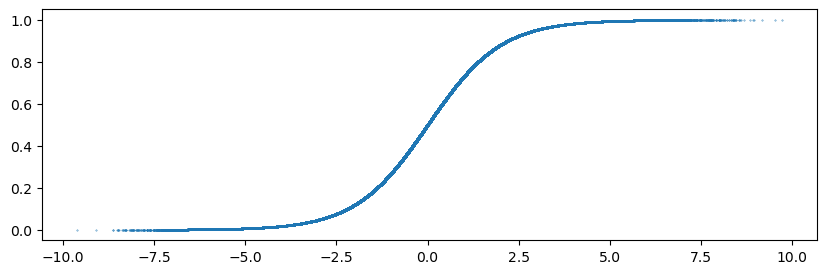

In [202]:
plt.figure(figsize=[10,3])
plt.scatter(DF['SCORE'], DF['PD'],s=0.1)

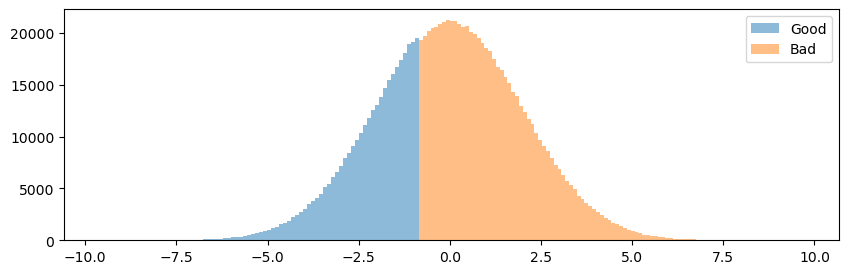

In [203]:
plt.figure(figsize=[10,3])
plt.hist(DF[DF['BAD_FLAG']==0]['SCORE'], bins=80, alpha=0.5, label='Good')
plt.hist(DF[DF['BAD_FLAG']==1]['SCORE'], bins=100, alpha=0.5, label='Bad')
plt.legend()
plt.show()

### Внесем шум в идеальный мир

In [17]:
Sigma = {}
Sigma[0] = 1

In [205]:
# create_model(DF, model_num=0)



# DF['DIF_M0'] = random_diff(state=41, N=N_init, Sigma=Sigma[0])
# DF['SCORE_M0'] = DF['SCORE'] + DF['DIF_M0']

In [206]:
def create_model(df, model_num, sigma_dic, score_col='SCORE_M0000'):
    model_suff = '_M%04i' % (model_num)
    df['DIF' + model_suff] = random_diff(state=model_num, N=N_init, Sigma=sigma_dic[model_num])
    df['SCORE' + model_suff] = df[score_col] + df['DIF' + model_suff]
    df['PD' + model_suff] = sigmoid(df['SCORE' + model_suff])

In [209]:
# Создание наилучшей модели - нулевой модели
create_model(DF, model_num=0, sigma_dic=Sigma, score_col='SCORE')

In [210]:
DF.head()

,SCORE,PD,BAD_FLAG,DIF_M0000,SCORE_M0000,PD_M0000
0,-1.004360,0.268085,0,1.764052,0.759692,0.681287
1,-0.860319,0.297273,0,0.400157,-0.460162,0.386947
2,-0.818728,0.306034,1,0.978738,0.160010,0.539917
3,-0.810055,0.307879,1,2.240893,1.430838,0.807032
4,-1.756936,0.147175,0,1.867558,0.110622,0.527627


**Возможная наилучшая модель**

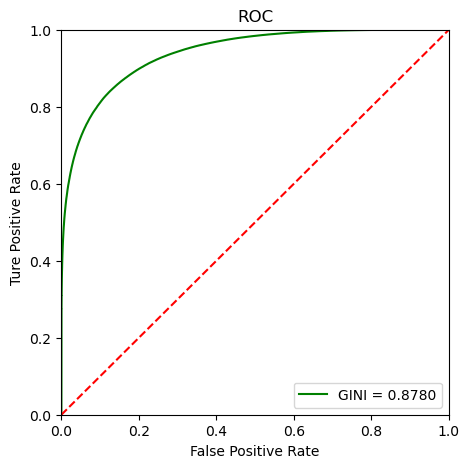

0.8780113643938052

In [211]:
gini(DF, score='SCORE_M0000', plot=True)

0.5044697797155349


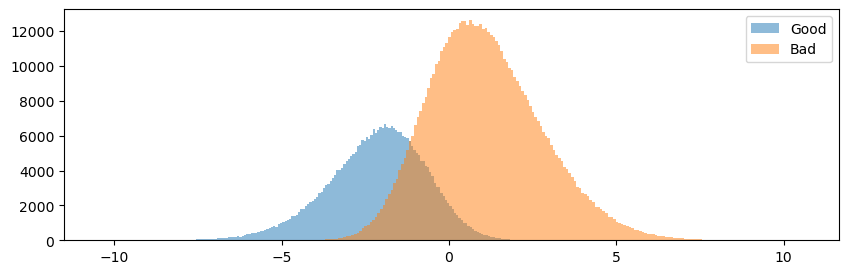

In [212]:
ix_bad_0 = DF['BAD_FLAG']==0
ix_bad_1 = DF['BAD_FLAG']==1
k = ix_bad_0.sum()/ix_bad_1.sum()
print(k)

plt.figure(figsize=[10,3])

plt.hist(DF[ix_bad_0]['SCORE_M0000'], bins=200, alpha=0.5, label='Good')
plt.hist(DF[ix_bad_1]['SCORE_M0000'], bins=200, alpha=0.5, label='Bad')
plt.legend()
plt.show()

In [213]:
Sigma[1] = 0.6
Sigma[2] = 0.4

In [113]:
for model_num in [1,2]:
    create_model(DF, model_num=model_num, sigma_dic=Sigma)    

In [114]:
DF

,SCORE,PD,BAD_FLAG,DIF_M0000,SCORE_M0000,DIF_M0001,SCORE_M0001,DIF_M0002,SCORE_M0002,PD_M0000,PD_M0001,PD_M0002
0,-1.004360,0.268085,0,1.764052,0.759692,0.974607,1.734299,-0.166703,0.592989,0.681287,0.849962,0.644051
1,-0.860319,0.297273,0,0.400157,-0.460162,-0.367054,-0.827215,-0.022507,-0.482668,0.386947,0.304234,0.381622
2,-0.818728,0.306034,1,0.978738,0.160010,-0.316903,-0.156893,-0.854478,-0.694468,0.539917,0.460857,0.333040
3,-0.810055,0.307879,1,2.240893,1.430838,-0.643781,0.787057,0.656108,2.086946,0.807032,0.687199,0.889628
4,-1.756936,0.147175,0,1.867558,0.110622,0.519245,0.629867,-0.717374,-0.606752,0.527627,0.652459,0.352800
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.993007,0.729682,1,1.455906,2.448913,0.035747,2.484660,-0.724172,1.724741,0.920482,0.923059,0.848738
999996,-4.752641,0.008555,0,0.109024,-4.643617,0.084209,-4.559408,0.079661,-4.563955,0.009531,0.010360,0.010313
999997,2.301008,0.908960,1,-0.797283,1.503725,-0.357697,1.146028,-0.549288,0.954437,0.818129,0.758785,0.722007
999998,-3.069961,0.044363,0,0.874756,-2.195205,0.711624,-1.483581,-0.432220,-2.627425,0.100182,0.184887,0.067394


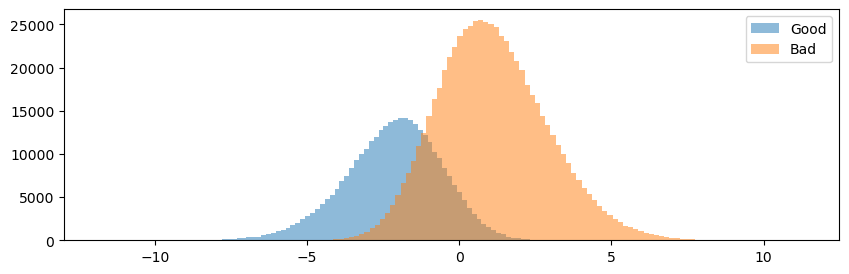

In [95]:
plt.figure(figsize=[10,3])
plt.hist(DF[DF['BAD_FLAG']==0]['SCORE_M0001'], bins=100, alpha=0.5, label='Good')
plt.hist(DF[DF['BAD_FLAG']==1]['SCORE_M0001'], bins=100, alpha=0.5, label='Bad')
plt.legend()
plt.show()

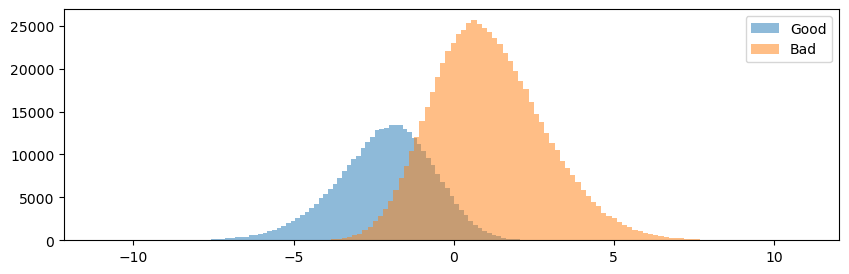

In [96]:
plt.figure(figsize=[10,3])
plt.hist(DF[DF['BAD_FLAG']==0]['SCORE_M0002'], bins=100, alpha=0.5, label='Good')
plt.hist(DF[DF['BAD_FLAG']==1]['SCORE_M0002'], bins=100, alpha=0.5, label='Bad')
plt.legend()
plt.show()

In [99]:
for model_num in [0,1,2]:
    col = 'SCORE_M%04i'%(model_num)
    print(col, gini(DF, score=col))

SCORE_M0000 0.8780113643938052
SCORE_M0001 0.8439274708174025
SCORE_M0002 0.8623551988018101


In [214]:
def create_model(df, model_num, sigma_dic, score_col='SCORE_M0000'):
    model_suff = '_M%04i' % (model_num)
    df['DIF' + model_suff] = random_diff(state=model_num, N=N_init, Sigma=sigma_dic[model_num])
    df['SCORE' + model_suff] = df[score_col] + df['DIF' + model_suff]
    df['PD' + model_suff] = sigmoid(df['SCORE' + model_suff])

In [236]:
# Проводим калибовку
def calibration(df, model_num, period):
    """
    df - датафрейм с данными, в него будут добавлены поля
    model_num - калибруемая модель
    period - индекс, для отбора выборки для калибровки
    """
    model_suff = '_M%04i' % (model_num)
    model_lr = LR().fit(df.loc[period,['SCORE' + model_suff]], df.loc[period, 'BAD_FLAG'])
    B0 = model_lr.intercept_[0]
    B1 = model_lr.coef_[0][0]
    df['SCORE_CLB' + model_suff] = B0+B1*df['SCORE' + model_suff]
    df['PD_CLB' + model_suff ] = sigmoid(df['SCORE_CLB' + model_suff])
    df['GRADE' + model_suff] = df['PD_CLB' + model_suff].apply(lambda x: grade(x))
    
    print('B0=%03f B1=%03f' % (B0, B1))
    df_plot = df.loc[period,:].groupby('GRADE' + model_suff)[['PD_CLB' + model_suff,
                                                              'BAD_FLAG']].agg('mean')
    df_plot.plot()
    print('gini = %04f' % gini(df.loc[period,:],score='SCORE' + model_suff))

In [216]:
def approval(df, model_num, pd_cutoff, mm):
    """
    df - датафрейм с данными, в него будут добавлены поля
    model_num - модель для одобрения
    pd_cutoff - порог одобрения
    mm - месяц одобрения
    """
    ix = df.sample(n=int(df.shape[0]/10), 
                   random_state=(model_num+1000)*1000+mm
                  ).index
    model_suff = '_M%04i' % (model_num)
    mm_suff = '_%02i' % (mm)
    col_approval = 'APPROVAL' + model_suff + mm_suff
    # 0 - отказ, 1 - одобрение
    df.loc[ix, col_approval] = np.where(df.loc[ix,'PD_CLB' + model_suff] > pd_cutoff, 0, 1)

    print(df.loc[ix, col_approval].mean())
    print(df.loc[ix, [col_approval]].groupby(col_approval)[[col_approval]].count())
    

In [217]:
create_model(DF, model_num=1, sigma_dic=Sigma)

B0=1.479415 B1=1.303241
gini = 0.843927


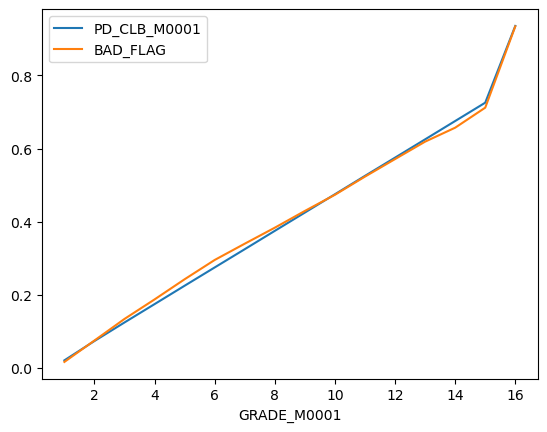

In [237]:
calibration(DF, model_num=1, period = DF.index)

In [219]:
approval(DF, model_num=1, pd_cutoff=0.2, mm=1)

0.17197
                   APPROVAL_M0001_01
APPROVAL_M0001_01                   
0.0                            82803
1.0                            17197


In [220]:
create_model(DF, model_num=2, sigma_dic=Sigma)

In [221]:
ix_arr = [DF[c]==1 for c in DF.columns if 'APPROVAL_M0001' in c]
ix_mm = ix_arr[0]
for i in ix_arr:
    ix_mm = ix_mm|i

B0=0.941178 B1=1.317976
gini = 0.620943


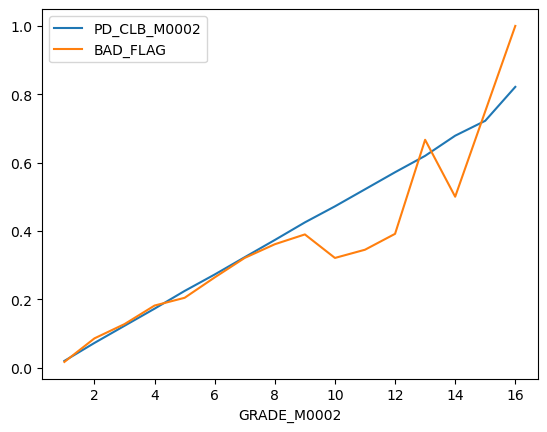

In [238]:
calibration(DF, model_num=2, period = ix_mm)

<Axes: >

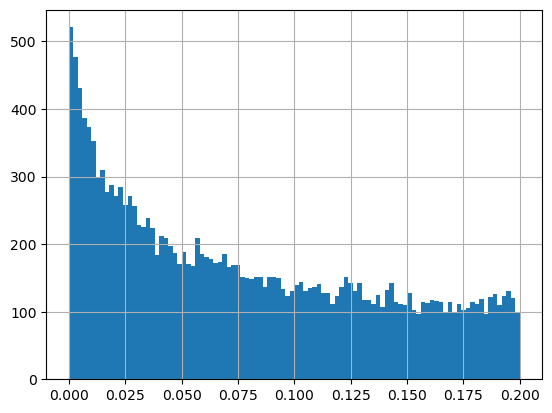

In [223]:
DF.loc[ix_mm,'PD_CLB_M0001'].hist(bins=100)

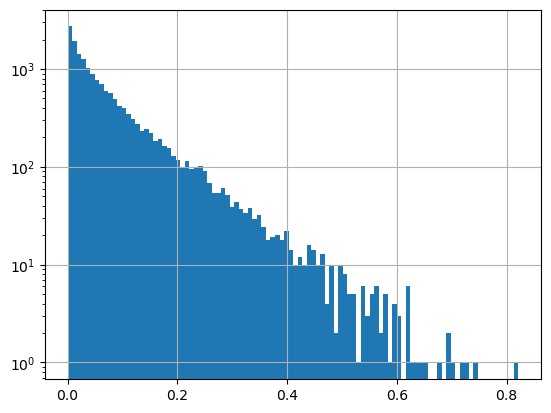

In [224]:
DF.loc[ix_mm,'PD_CLB_M0002'].hist(bins=100)
plt.yscale('log')

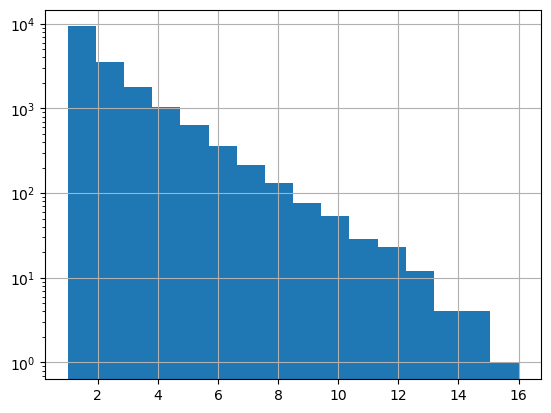

In [225]:
DF.loc[ix_mm,'GRADE_M0002'].hist(bins=16)
plt.yscale('log')

In [226]:
approval(DF, model_num=2, pd_cutoff=0.2, mm=2)

0.21871
                   APPROVAL_M0002_02
APPROVAL_M0002_02                   
0.0                            78129
1.0                            21871


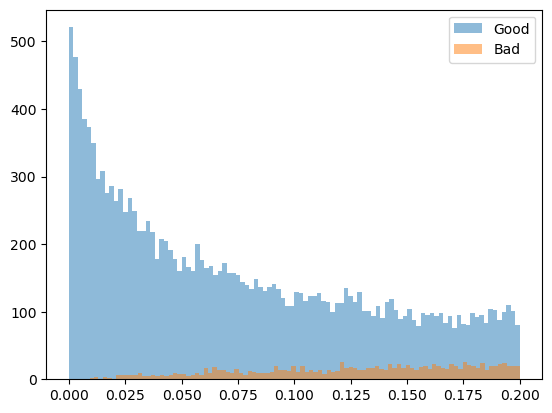

In [227]:
ix_app_m1 = DF['APPROVAL_M0001_01'] == 1
plt.hist(DF[ix_app_m1&(DF['BAD_FLAG']==0)]['PD_CLB_M0001'], bins=100, alpha=0.5, label='Good')
plt.hist(DF[ix_app_m1&(DF['BAD_FLAG']==1)]['PD_CLB_M0001'], bins=100, alpha=0.5, label='Bad')
plt.legend()
plt.show()

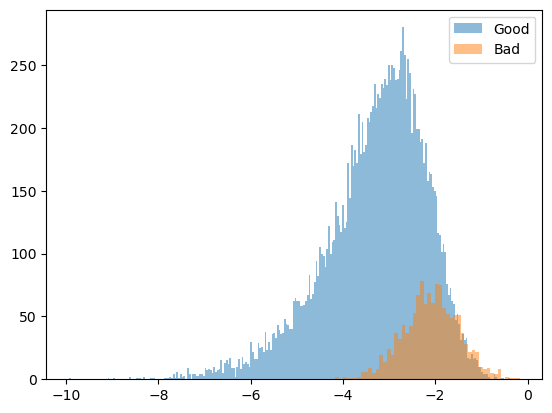

In [229]:
plt.hist(DF[ix_app_m1&(DF['BAD_FLAG']==0)]['SCORE_M0000'], bins=250, alpha=0.5, label='Good')
plt.hist(DF[ix_app_m1&(DF['BAD_FLAG']==1)]['SCORE_M0000'], bins=50, alpha=0.5, label='Bad')
plt.legend()
plt.show()

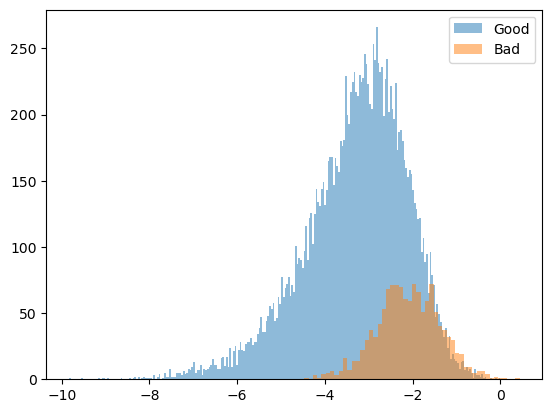

In [253]:
plt.hist(DF[ix_app_m1&(DF['BAD_FLAG']==0)]['SCORE_M0002'], bins=250, alpha=0.5, label='Good')
plt.hist(DF[ix_app_m1&(DF['BAD_FLAG']==1)]['SCORE_M0002'], bins=50, alpha=0.5, label='Bad')
plt.legend()
plt.show()

In [230]:
DF[ix_app_m1].head()

,SCORE,PD,BAD_FLAG,DIF_M0000,SCORE_M0000,PD_M0000,DIF_M0001,SCORE_M0001,PD_M0001,SCORE_CLB_M0001,PD_CLB_M0001,GRADE_M0001,APPROVAL_M0001_01,DIF_M0002,SCORE_M0002,PD_M0002,SCORE_CLB_M0002,PD_CLB_M0002,GRADE_M0002,APPROVAL_M0002_02
29,-4.705832,0.008961,0,1.469359,-3.236474,0.037816,0.318213,-2.918260,0.051258,-2.323780,0.089173,2,1.0,-0.061398,-3.297872,0.035644,-3.405337,0.032129,1,NaN
48,-1.942263,0.125399,0,-1.613898,-3.556161,0.027756,0.072095,-3.484066,0.029769,-3.061160,0.044738,1,1.0,-0.331654,-3.887815,0.020079,-4.182868,0.015025,1,NaN
80,-2.213321,0.098561,0,-1.165150,-3.378471,0.032975,-0.133397,-3.511868,0.028976,-3.097393,0.043215,1,1.0,-0.075788,-3.454259,0.030642,-3.611451,0.026302,1,NaN
104,-2.263108,0.094225,0,-1.173123,-3.436232,0.031182,-0.656947,-4.093179,0.016412,-3.854981,0.020735,1,1.0,-0.121635,-3.557866,0.027710,-3.748003,0.023022,1,NaN
238,-2.352870,0.086838,0,0.426259,-1.926611,0.127126,-1.004517,-2.931129,0.050636,-2.340550,0.087820,2,1.0,-0.685627,-2.612238,0.068355,-2.501689,0.075740,2,NaN


In [231]:
gini(DF[ix_app_m1],score='SCORE_M0001')

0.5024505324797284

In [347]:
DF.loc[ix_app_m1, 'GRADE_M1'] = DF.loc[ix_app_m1, 'PD_M1_CALIB'].apply(lambda x: grade(x))
DF_MODEL_1 = DF.loc[ix_app_m1,:].groupby('GRADE_M1')[['PD_M1_CALIB','BAD_FLAG']].agg('mean')

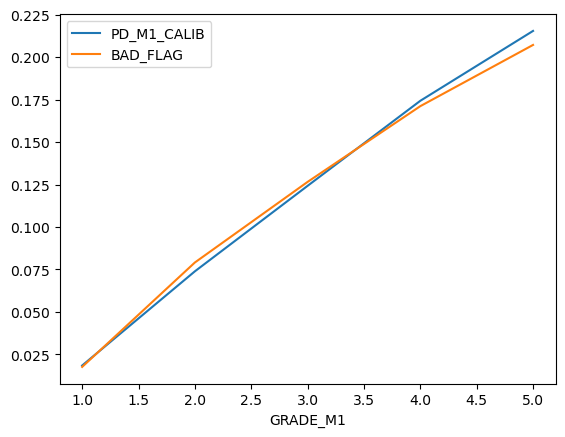

In [348]:
DF_MODEL_1.plot();

In [350]:
DF['APPROVAL_M1_2'] = np.where(DF['PD_M1_CALIB']<0.1,1,0) # 0 - отказ, 1 - одобрение
print(DF['APPROVAL_M1_2'].mean())
DF.groupby(['APPROVAL_M1_2'])[['BAD_FLAG']].agg(['count','sum','mean'])

0.108736


BAD_FLAG                  
                 count     sum      mean
APPROVAL_M1_2                           
0               445632  330736  0.742173
1                54368    2021  0.037173

In [351]:
ix_app_m1_2 = DF['APPROVAL_M1_2'] == 1

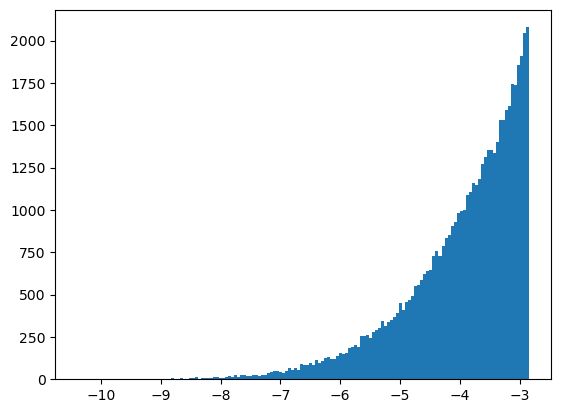

In [376]:
plt.hist(DF[ix_app_m1_2]['SCORE_M1'], bins = 150);

In [352]:
print(gini(DF[ix_app_m1_2],score='SCORE_M1'))
print(gini(DF[ix_app_m1_2],score='SCORE_M2'))

0.5144024592032952
0.6447877831794753


In [353]:
model_m2 = LR().fit(DF[ix_app_m1_2][['SCORE_M2']], DF[ix_app_m1_2]['BAD_FLAG'])
B0_M2 = model_m1.intercept_[0]
B1_M2 = model_m1.coef_[0][0]
print(B0_M2, B1_M2)

2.1480447735346564 1.5249330764734796


In [354]:
DF.loc[:, 'PD_M2_CALIB'] = calibration(DF.loc[:, 'SCORE_M2'], B0_M2, B1_M2)

In [355]:
DF['APPROVAL_M2_1'] = np.where(DF['PD_M2_CALIB']<0.17,1,0) # 0 - отказ, 1 - одобрение
print(DF['APPROVAL_M2_1'].mean())
DF.groupby(['APPROVAL_M2_1'])[['BAD_FLAG']].agg(['count','sum','mean'])

0.139762


BAD_FLAG                  
                 count     sum      mean
APPROVAL_M2_1                           
0               430119  329568  0.766225
1                69881    3189  0.045635

In [240]:
ix_app_m2_1 = DF['APPROVAL_M0002_02'] == 1

In [241]:
print(gini(DF[ix_app_m2_1],score='SCORE_M0002'))

0.5577062005763875


In [242]:
print(gini(DF[ix_app_m2_1],score='SCORE_M0001'))

0.5229536594099515


In [239]:
DF['SCORE_M1+M2'] = DF['SCORE_M0001'] + DF['SCORE_M0002']
DF['SCORE_M1-M2'] = DF['SCORE_M0001'] - DF['SCORE_M0002']

In [371]:
print(gini(DF[ix_app_m2_1],score='SCORE_M1+M2'))

0.5638652232189398


In [243]:
Norm_stat = DF[ix_app_m2_1]['SCORE_M1-M2'].agg(['count','min','max','mean','median'])
Norm_stat

count     21871.000000
min          -2.703969
max           2.904384
mean          0.100314
median        0.099985
Name: SCORE_M1-M2, dtype: float64

In [244]:
H_norm = Norm_stat['count'] * ( (Norm_stat['max'] - Norm_stat['min'])/250)
H_norm

490.6411457895953

In [245]:
Mu_norm = Norm_stat['median']
Mu_norm

0.09998480597012094

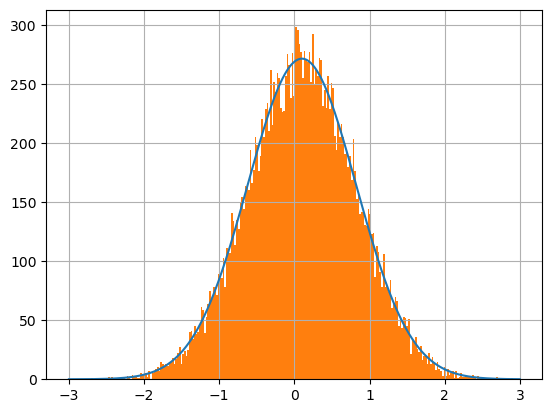

In [248]:
x = np.arange (-3, 3, 0.001)

plt.plot(x, norm.pdf(x, Mu_norm, (Sigma[1]**2+Sigma[2]**2)**0.5)*H_norm)
plt.hist(DF[ix_app_m2_1]['SCORE_M1-M2'], bins=250)
plt.grid()

(0.0, 1.0)

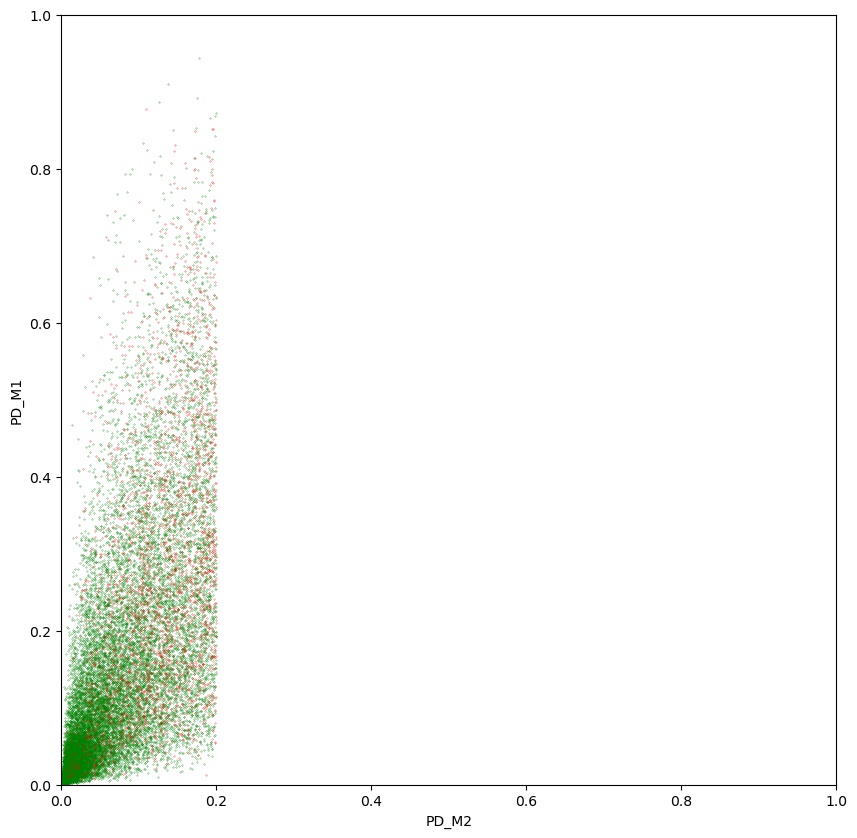

In [249]:
plt.figure(figsize=(10,10))
plt.scatter(DF[ix_app_m2_1&(DF['BAD_FLAG']==0)]['PD_CLB_M0002'],
            DF[ix_app_m2_1&(DF['BAD_FLAG']==0)]['PD_CLB_M0001'],
            s=0.05, c='green')
plt.scatter(DF[ix_app_m2_1&(DF['BAD_FLAG']==1)]['PD_CLB_M0002'],
            DF[ix_app_m2_1&(DF['BAD_FLAG']==1)]['PD_CLB_M0001'],
            s=0.05, c='red')

plt.xlabel('PD_M2')
plt.ylabel('PD_M1')
plt.xlim([0,1])
plt.ylim([0,1])

(-8.0, 0.0)

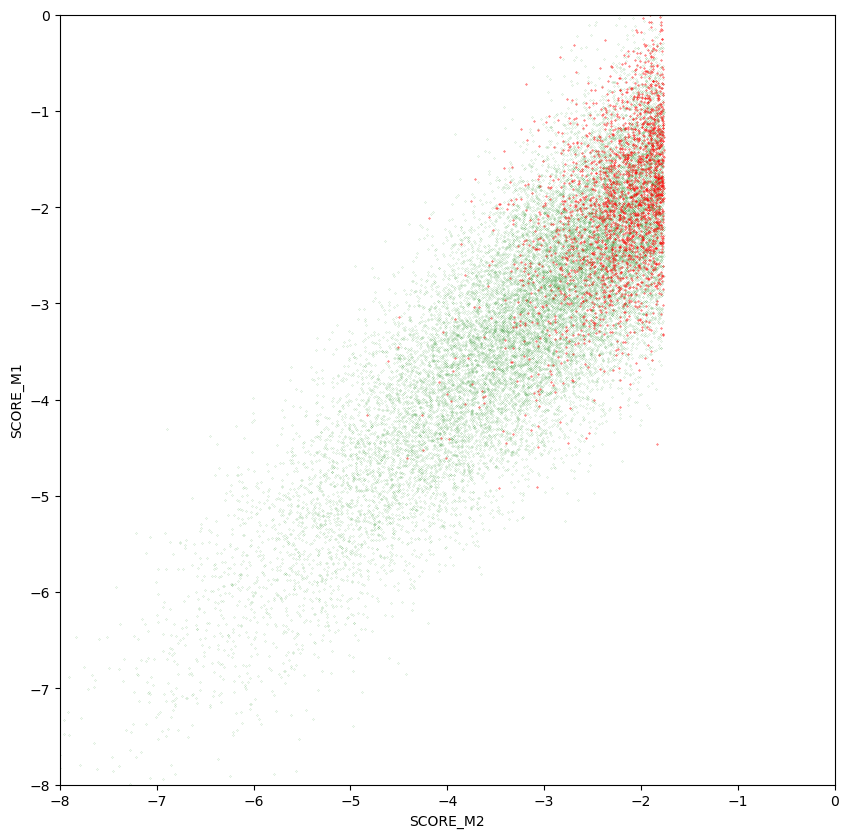

In [251]:
plt.figure(figsize=(10,10))
plt.scatter(DF[ix_app_m2_1&(DF['BAD_FLAG']==0)]['SCORE_M0002'],
            DF[ix_app_m2_1&(DF['BAD_FLAG']==0)]['SCORE_M0001'],
            s=0.01, c='green', alpha = 0.8)

plt.scatter(DF[ix_app_m2_1&(DF['BAD_FLAG']==1)]['SCORE_M0002'],
            DF[ix_app_m2_1&(DF['BAD_FLAG']==1)]['SCORE_M0001'],
            s=0.1, c='red')

plt.xlabel('SCORE_M2')
plt.ylabel('SCORE_M1')
plt.xlim([-8,0])
plt.ylim([-8,0])